# Condensed rates vs. experiments
## Zhang & Winfree 2009, Dabby 2013, Genot et al. 2011

# Initialization - Global

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log10, sqrt

sns.set(style="darkgrid")

# Helper function to calculate Euclidean distance
def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))
    
def sema(vect, fig):
    #semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    nv = []
    for line in vect:
        v = []
        for (x,y) in fig.pepperargs[line].items():
            if x == 'conc': continue
            if x == 'max_complex_size': continue
            if x == 'max_complex_count': continue
            if x == 'max_reaction_count': continue
            if x == 'condensed': 
                z = x if y is True else 'detailed'
            else:
                z = '{}={}'.format(x,y)
            v.append(z)
        nv.append(', '.join(v))
    return nv
 

## Initialization - Figure 1

In [4]:
from zhang2009_rates import data; z09r = data()
from dabby2013_rates import data; d13r = data()

Table1 = pd.DataFrame()

### Zhang and Winfree 2009

![title](../papers/raw_figures/zhang2009r_F1.svg)

In [5]:
for fig in z09r:
    fig.eval()
    #display(fig.pepperargs['default'])
    semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    for df in fig.get_dataframes():
        df['Semantics']=semantics
        df.to_latex(fig.fname+'.tex', index=False, float_format='{:.3f}'.format)
        df['Name']=fig.name 
        #display(df)
        dist = euclid('Rate (experiment)', 'Rate (calculated)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.fname, dist))
        Table1 = Table1.append(df)


Zhang2009-3way -- Fitness: 0.669532
Zhang2009-3wayX -- Fitness: 2.9244


### Dabby 2013

![title](../papers/raw_figures/dabby2013.svg)

In [6]:
for fig in d13r:
    fig.eval()
    #display(fig.pepperargs['default'])
    semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    for df in fig.get_dataframes():
        df['Semantics']=semantics
        df.to_latex(fig.fname+'.tex', float_format='{:.3f}'.format, index=False)
        df['Name']=fig.name 
        display(df)
        dist = euclid('Rate (experiment)', 'Rate (calculated)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.fname+'.tex', dist))
        Table1 = Table1.append(df)        

,Input Filename,"(n, m)",Reaction,Semantics,Rate (calculated),Rate (experiment),Name
0,tmp/Dabby2013-4way-00,"(0, 2)",clx + rep -> pr1 + pr2,condensed=True,5.597803e-03,0.047,Dabby (2013)\n4-way strand displacement
1,tmp/Dabby2013-4way-01,"(2, 2)",clx + rep -> pr1 + pr2,condensed=True,1.426023e-02,0.100,Dabby (2013)\n4-way strand displacement
2,tmp/Dabby2013-4way-02,"(2, 0)",clx + rep -> pr1 + pr2,condensed=True,5.597803e-03,0.033,Dabby (2013)\n4-way strand displacement
3,tmp/Dabby2013-4way-03,"(4, 2)",clx + rep -> pr1 + pr2,condensed=True,2.675033e+00,0.930,Dabby (2013)\n4-way strand displacement
4,tmp/Dabby2013-4way-04,"(4, 0)",clx + rep -> pr1 + pr2,condensed=True,1.739764e+00,0.039,Dabby (2013)\n4-way strand displacement
5,tmp/Dabby2013-4way-05,"(0, 4)",clx + rep -> pr1 + pr2,condensed=True,1.739764e+00,0.970,Dabby (2013)\n4-way strand displacement
6,tmp/Dabby2013-4way-06,"(2, 4)",clx + rep -> pr1 + pr2,condensed=True,2.675033e+00,56.000,Dabby (2013)\n4-way strand displacement
7,tmp/Dabby2013-4way-07,"(6, 2)",clx + rep -> pr1 + pr2,condensed=True,8.280459e+02,490.000,Dabby (2013)\n4-way strand displacement
8,tmp/Dabby2013-4way-08,"(0, 6)",clx + rep -> pr1 + pr2,condensed=True,5.405478e+02,58.000,Dabby (2013)\n4-way strand displacement
9,tmp/Dabby2013-4way-09,"(4, 4)",clx + rep -> pr1 + pr2,condensed=True,1.514773e+02,770.000,Dabby (2013)\n4-way strand displacement


Dabby2013-4way.tex -- Fitness: 3.8421


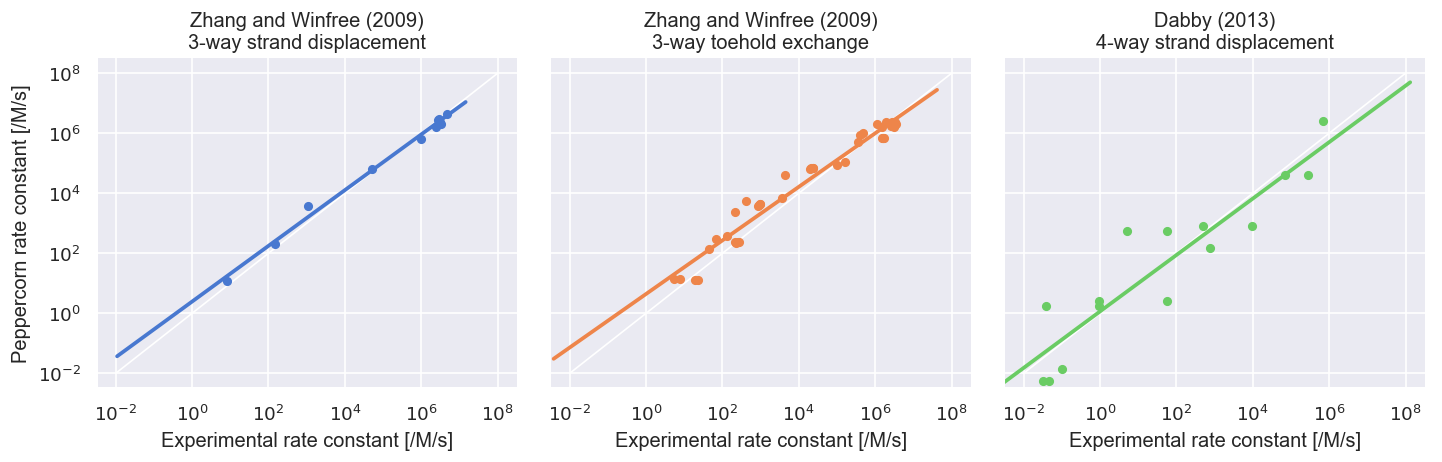

In [7]:
# Data adjustments:
tmpfig = Table1.copy()
tmpfig['Rate (experiment)'] = log10(tmpfig['Rate (experiment)'])
tmpfig['Rate (calculated)'] = log10(tmpfig['Rate (calculated)'])
#display(tmpfig)

#grid = sns.lmplot('x', 'y', data, size=7, truncate=True, scatter_kws={"s": 100})
#grid.set(xscale="log", yscale="log")

# Figure size adjustments:
plt.rcParams['figure.dpi'] = 120

# Figure layout:
#g = sns.relplot(x="Rate (experiment)", y="Rate (calculated)", hue='Name', data=tmpfig)
#g = sns.jointplot(x="Rate (experiment)", y="Rate (calculated)", data=tmpfig, kind="reg", color="m", height=5)

g = sns.lmplot(x="Rate (experiment)", y="Rate (calculated)", col="Name", hue='Name', data=tmpfig, 
           col_wrap=3, ci=None, truncate=False, palette="muted", height=4, scatter_kws={"s": 20, "alpha": 1})

#g.set(xscale="log",yscale="log")
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(-2, 8)
plt.xlim(-2.5, 8.5)
plt.ylim(-2.5, 8.5)

for ax in g.axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.0f} }}$".format(x)))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.0f} }}$".format(x)))

    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='Experimental rate constant [/M/s]')
    
g.axes[0].set(ylabel='Peppercorn rate constant [/M/s]')
    
g.set_titles(row_template="{row_name}", col_template="{col_name}")

plt.savefig('proximal_rates.pdf', bbox_inches='tight')
plt.savefig('proximal_rates.svg', bbox_inches='tight')


# Genot et al. 2011

Note: Results for Figure 4D vary!!

![title](../papers/raw_figures/genot2011r_F3.svg)

![title](../papers/raw_figures/genot2011r_F4.svg)

In [8]:
from genot2011 import data; g11 = data()
Table2 = pd.DataFrame()

In [15]:
for e, fig in enumerate(g11):
    fig.pepperargs['detailed-default'] = fig.pepperargs['default'].copy()
    fig.pepperargs['detailed-default']['condensed'] = False

    fig.pepperargs['ddG'] = fig.pepperargs['default'].copy()
    fig.pepperargs['ddG']['ddG_bind'] = 0.4 # 0.5  and 0.6 works well

    fig.pepperargs['detailed-ddG'] = fig.pepperargs['ddG'].copy()
    fig.pepperargs['detailed-ddG']['condensed'] = False
    
    fig.eval('default', cmpfig='hack', verbose=0)
    #fig.eval('detailed-default', cmpfig='hack', verbose=0)
    #fig.eval('ddG', cmpfig='hack', verbose=0)
    #fig.eval('detailed-ddG', cmpfig='hack', verbose=0)

    #display(fig.pepperargs['default'])
    for df in fig.get_dataframes():
        df['Semantics']=sema(df['Semantics'], fig)
        df['Name']=fig.name
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name,dist))
        Table2 = Table2.append(df)

Fig. 3: a=14, b=22, varying: n, m -- Fitness: 1.15245
Fig. 4A: n=m=0, varying: a=11 a=9) -- Fitness: 0.529667
Fig. 4B: n=m=1, varying: a=11 a=9) -- Fitness: 1.16364
Fig. 4C: n=m=0, a=6, varying: [invader]$_0$ -- Fitness: 2.81206
Fig. 4D: n=m=17, a=14, varying: [invader]$_0$ -- Fitness: 1.13747
Sup. Fig. 4A: a=14, b=22 varying: n,m -- Fitness: 2.20854


,Input Filename,Simulation,Reporter,Metric,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Genot2011-F3-00,S=6.6 I=660,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,51.805181,1.98,42,"Fig. 3: a=14, b=22, varying: n, m"
1,tmp/Genot2011-F3-01,S=6.6 I=660,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,248.424842,1.98,48,"Fig. 3: a=14, b=22, varying: n, m"
2,tmp/Genot2011-F3-02,S=6.6 I=660,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,350.335034,1.98,100,"Fig. 3: a=14, b=22, varying: n, m"
3,tmp/Genot2011-F3-03,S=6.6 I=660,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,473.947395,1.98,91,"Fig. 3: a=14, b=22, varying: n, m"
0,tmp/Genot2011-F4A-00,S=6.6 I=22,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,5.200520,1.98,2,"Fig. 4A: n=m=0, varying: a=11 a=9)"
1,tmp/Genot2011-F4A-01,S=6.6 I=22,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,6.400640,1.98,3,"Fig. 4A: n=m=0, varying: a=11 a=9)"
0,tmp/Genot2011-F4B-00,S=6.6 I=22,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,5.200520,1.98,15,"Fig. 4B: n=m=1, varying: a=11 a=9)"
1,tmp/Genot2011-F4B-01,S=6.6 I=22,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,6.400640,1.98,75,"Fig. 4B: n=m=1, varying: a=11 a=9)"
0,tmp/Genot2011-F4C-00,S=6.6 I=330,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,0.700070,1.98,25,"Fig. 4C: n=m=0, a=6, varying: [invader]$_0$"
1,tmp/Genot2011-F4C-00,S=6.6 I=145,T,completion-time,"condensed, k_fast=0.01, k_slow=1e-10",1.98,1.600160,1.98,75,"Fig. 4C: n=m=0, a=6, varying: [invader]$_0$"


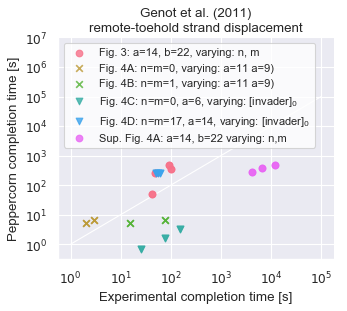

In [16]:
display(Table2)
Table2.to_latex('Genot2011data.tex', index=False, float_format='{:.3g}'.format)

tmpfig = Table2.copy()
#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['default', 'detailed-default'])]
tmpfig['Time (experiment)'] = log10(tmpfig['Time (experiment)'])
tmpfig['Time (simulation)'] = log10(tmpfig['Time (simulation)'])
#display(tmpfig)

sns.set_palette("husl")
#sns.set(rc={'figure.figsize':(8,4)})


# Figure size adjustments:
plt.rcParams['figure.dpi'] = 80

mycolors = ['blue', 
            'red', 
            'green', 
            'orange', 
            'maroon', 
            'springgreen', 
            'cyan', 
            'magenta', 
            'yellow']
mycolors += list('kkkkkkkkkkk')
mymarker = list('po.*^v+_,phD8|_oooooooo')

g = sns.lmplot(x="Time (experiment)", y="Time (simulation)", hue='Name', #col="Semantics", 
               data=tmpfig, fit_reg=False, markers=['o', 'x', 'x', 'v', 'v', 'o'], legend=False)
#g.fig.set_size_inches(15.3,5.4)
g.fig.set_size_inches(4.3,3.4)

# Adjust plot
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(0, 5)
#plt.xlim(mi, ma)
plt.ylim(-.5, 7)
#plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.0f} }}$".format(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.0f} }}$".format(x)))

for ax in plt.gcf().get_axes():
    #print(ax)
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    #ax.set(xlabel='Experimental diagonal crossing time [$t_{exp} =10^x $ s]')

g.set(title='Genot et al. (2011)\nremote-toehold strand displacement')  
g.set(xlabel='Experimental completion time [s]')  
g.set(ylabel='Peppercorn completion time [s]')
    
#g.set_titles(row_template="{row_name}", col_template="{col_name}")
legend = plt.legend(ncol=1, loc='upper left', fontsize=10);
frame = legend.get_frame()
frame.set_facecolor('white')
#frame.set_edgecolor('red')

plt.savefig('remote_rates.pdf', bbox_inches='tight')
plt.savefig('remote_rates.svg', bbox_inches='tight')